# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [2]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
# Load the data (use delim_whitespace=True)
url = 'http://data.princeton.edu/wws509/datasets/salary.dat'
df = pd.read_table(url, delimiter='\s+')

# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [4]:
# Apply value_counts() to series for "sx", "dg", and "rk"

df.sx.value_counts()
# male      38
# female    14

df.dg.value_counts()
# doctorate    34
# masters      18

df.rk.value_counts()
# full         20
# assistant    18
# associate    14

full         20
assistant    18
associate    14
Name: rk, dtype: int64

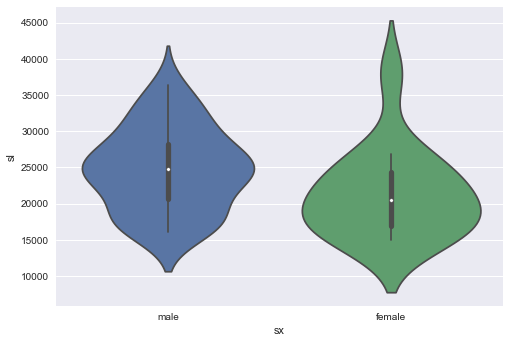

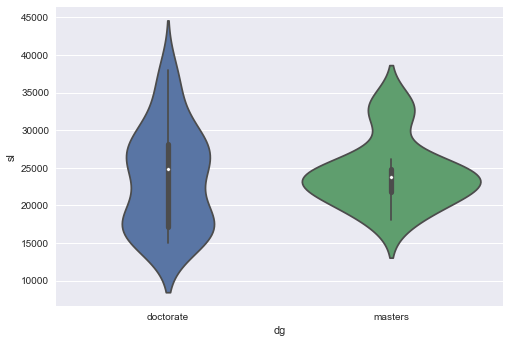

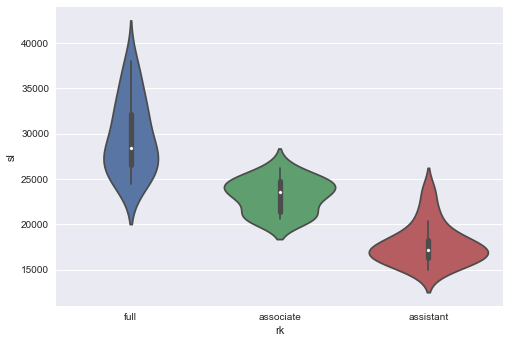

In [5]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"
sns.violinplot(x="dg", y="sl", data=df)
plt.show()

sns.violinplot(x="rk", y="sl", data=df)
plt.show()


In [6]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0,1,0,0,1,1,0
1,male,full,13,doctorate,22,35350,0,1,0,0,1,1,0
2,male,full,10,doctorate,23,28200,0,1,0,0,1,1,0
3,female,full,7,doctorate,27,26775,1,0,0,0,1,1,0
4,male,full,19,masters,30,33696,0,1,0,0,1,0,1


### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [7]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?


# Sample: 0.59530775232
# All data with sample model: 0.566246198627
# Sample with regularization: 0.594060249804
# All data with regularization model: 0.561519550726
    
# Sample: 0.825189933342
# All data with sample model: -0.288295144019
# Sample with regularization: 0.825001077986
# All data with regularization model: -0.270440452979  

# Sample: 0.681477302754
# All data with sample model: 0.097826662498
# Sample with regularization: 0.657856524862
# All data with regularization model: 0.326953283008

# Sample: 0.960647906274
# All data with sample model: 0.00664942332931
# Sample with regularization: 0.959328736556
# All data with regularization model: 0.215501021264

Sample: 0.749481829943
All data with sample model: 0.165191885159
Sample with regularization: 0.738967178606
All data with regularization model: 0.344728313772


Sample: 0.88630543814


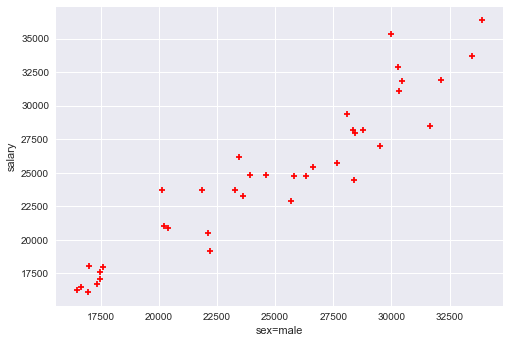

Sample: 0.69448811957


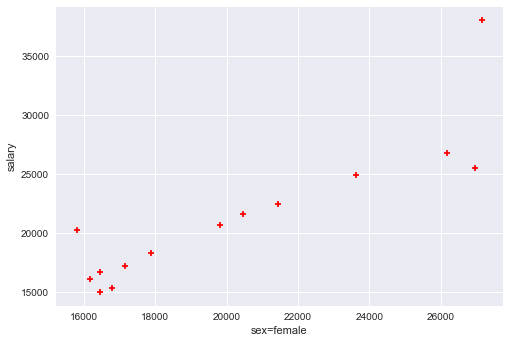

In [8]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("sex=male")
plt.ylabel("salary")
plt.show()

# Apply the same model to the women and compare the model score

mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()  ## comment the fitted model part out
# model = lm.fit(X, y)  ## comment the model out -- we want to use the same model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("sex=female")
plt.ylabel("salary")
plt.show()



Sample: 0.781837240731


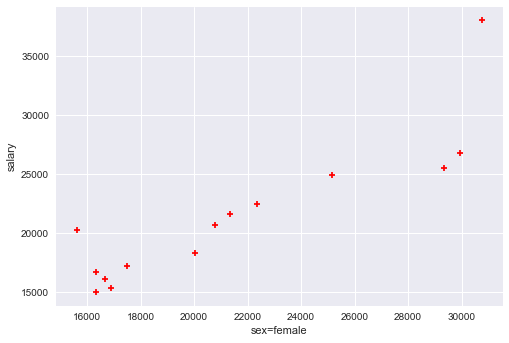

Sample: 0.657523429275


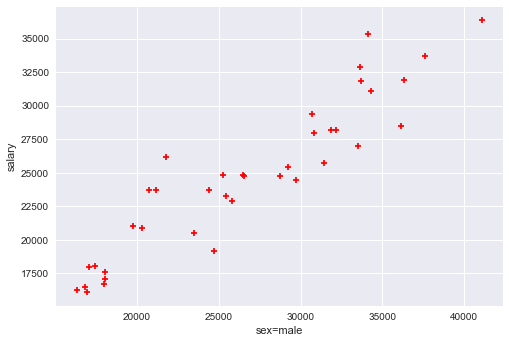

In [9]:
# What about the other order? Apply to women first


# Fit a model to the men
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("sex=female")
plt.ylabel("salary")
plt.show()

# Apply the same model to the women and compare the model score

mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()
# model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("sex=male")
plt.ylabel("salary")
plt.show()


# Apply to men


In [10]:
# This time use regularlization (RidgeCV)
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np


# Fit a model to the women
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

X_test = df[[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y_test = df[u'sl']


alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X, y)
set_alpha = ridgeregcv.alpha_
# 0.10000000000000001

ridgereg = Ridge(alpha=set_alpha, normalize=True)
model = ridgereg.fit(X, y)

# lm = linear_model.LinearRegression()
# model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)


y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))  

## MSE = 2754.54908907


# Apply to men
# redefine X and y for males
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()
# model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)


Sample: 0.776052416893
2754.54908907
Sample: 0.758931781825


### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

Sample: 0.876486548837


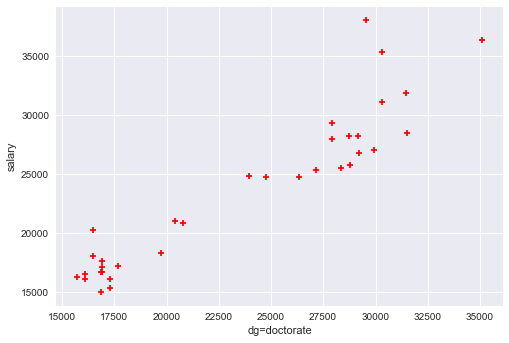

Sample: 0.6849888843


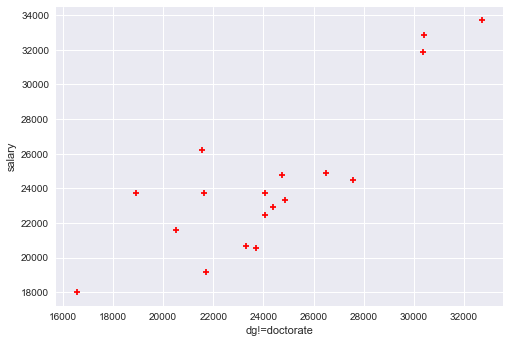

In [11]:
mask = (df["dg"] == "doctorate") 
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("dg=doctorate")
plt.ylabel("salary")
plt.show()

# Apply the same model to the women and compare the model score

mask = (df["dg"] != "doctorate") 
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()  ## comment the fitted model part out
# model = lm.fit(X, y)  ## comment the model out -- we want to use the same model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("dg!=doctorate")
plt.ylabel("salary")
plt.show()




Sample: 0.797682614586


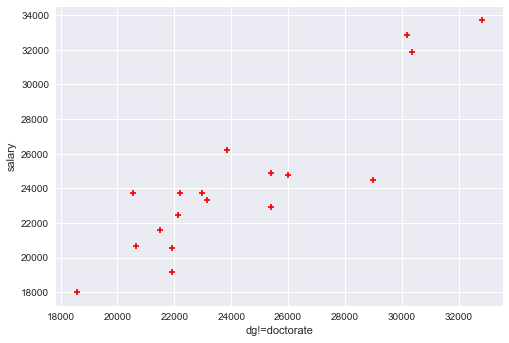

Sample: 0.745050571834


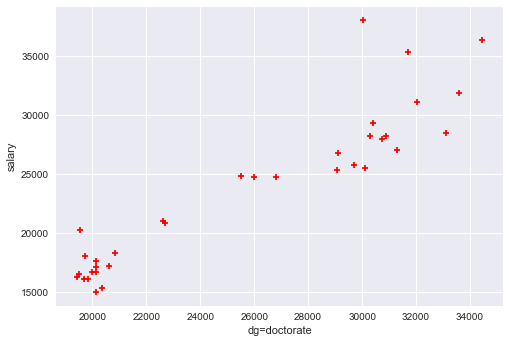

In [12]:
# Reverse the order

mask = (df["dg"] != "doctorate") 
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("dg!=doctorate")
plt.ylabel("salary")
plt.show()

# Apply the same model to the women and compare the model score

mask = (df["dg"] == "doctorate") 
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()  ## comment the fitted model part out
# model = lm.fit(X, y)  ## comment the model out -- we want to use the same model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("dg=doctorate")
plt.ylabel("salary")
plt.show()




In [13]:
# With regularization

mask = (df["dg"] != "doctorate")

X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

X_test = df[[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y_test = df[u'sl']

alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X, y)
set_alpha = ridgeregcv.alpha_
# 0.10000000000000001

ridgereg = Ridge(alpha=set_alpha, normalize=True)
model = ridgereg.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))  

## MSE = 2754.54908907


## now for != doctorate
mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

predictions = model.predict(X)
print "Sample:", model.score(X, y)




Sample: 0.797462454671
2870.75577188
Sample: 0.750026178539


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

Sample: 0.518546885368


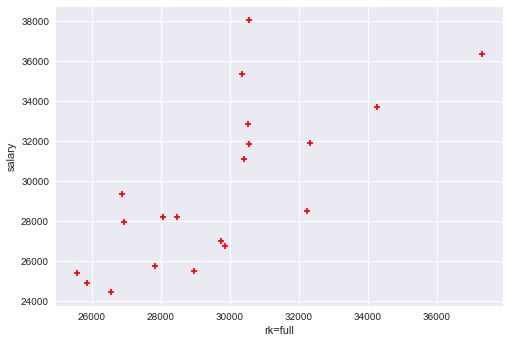

Sample: -18.353149193


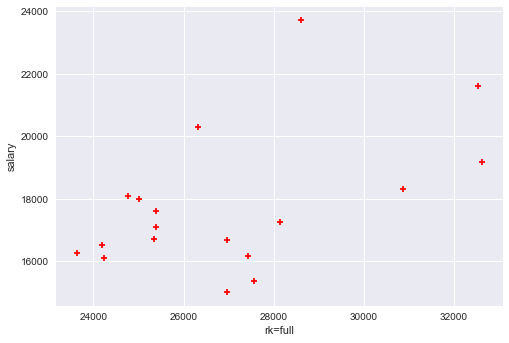

Sample: -7.45265423236


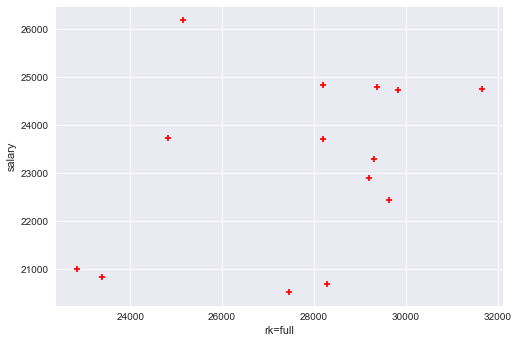

In [14]:
# Reverse the order

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# plot model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("rk=full")
plt.ylabel("salary")
plt.show()

# Apply the same model to the women and compare the model score

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# plot model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("rk=full")
plt.ylabel("salary")
plt.show()



mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# plot model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("rk=full")
plt.ylabel("salary")
plt.show()



Sample: 0.515603387509


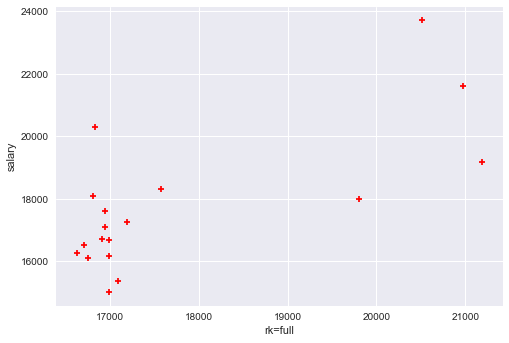

Sample: -5.80743845944


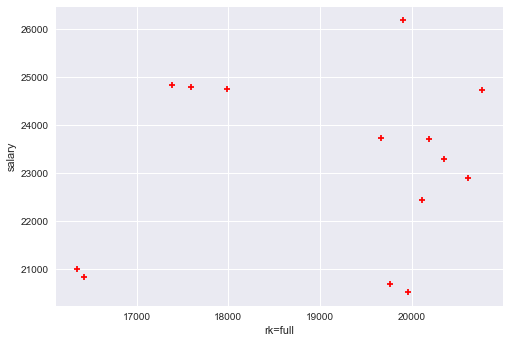

Sample: -8.39910384198


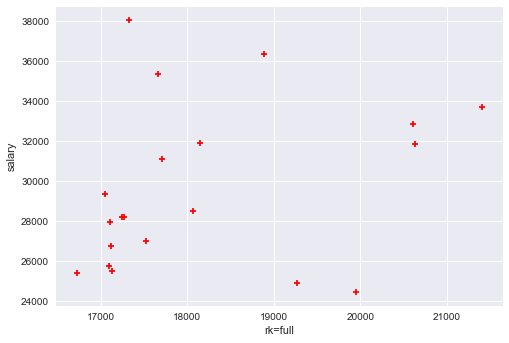

In [15]:
# The second permutation of three

# Reverse the order

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# plot model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("rk=full")
plt.ylabel("salary")
plt.show()

# Apply the same model to the women and compare the model score

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# plot model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("rk=full")
plt.ylabel("salary")
plt.show()



mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# plot model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("rk=full")
plt.ylabel("salary")
plt.show()




In [16]:
# The third permutation of three


mask = (df["rk"] == "full") # First subset, there are two more: assistant, associate

X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']

X_test = df[[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y_test = df[u'sl']

# determine alpha
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X, y)
set_alpha = ridgeregcv.alpha_

# fit a model
ridgereg = Ridge(alpha=set_alpha, normalize=True)
model = ridgereg.fit(X, y)

# use model
predictions = model.predict(X)
print "Sample:", model.score(X, y)


mask = (df["rk"] == "assistant") # First subset, there are two more: assistant, associate
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']
predictions = model.predict(X)
print "Sample:", model.score(X, y)


mask = (df["rk"] == "associate") # First subset, there are two more: assistant, associate
X = df[mask][[u'yr', u'yd', u'dg_doctorate',
       u'dg_masters', u'sx_female', u'sx_male']]
y = df[mask][u'sl']
predictions = model.predict(X)
print "Sample:", model.score(X, y)





Sample: 0.505889047104
Sample: -15.1008058642
Sample: -7.24244205258


# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [ ]:
# Without regularization
mask = df["sx"] == "female"


In [ ]:
# With regularization, RidgeCV

In [ ]:
# With regularization, LassoCV